#### AP156- Activity 2
##### Nica Jane B. Ferrer
##### 2013-25765 

In [ ]:
# One can verify this in fact by generating a bunch of datasets 
# Exercise: Using the code from gendata_book_post.py, generate at
# least 100 datasets, calculate chi^2 using Eq. 1.28 and show that
# the distribution of chi^2(bold{a0}) is given by Eq. 1.29

# The chi^2 distribution PDF (Eq. 1.29) is available from scipy.stats
# Use the help function to figure out the parameters: help(chi2.pdf)
# Tip: check out the other functions available help(chi2)



[ 0.98351102  0.98226915  0.10388218  0.07416891]


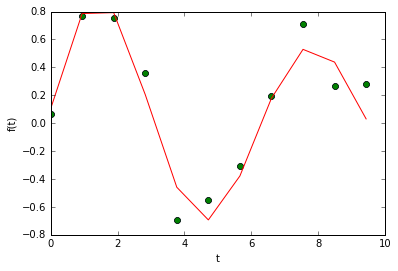

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gammainc
# If we perform many instances of an experiment, e.g. output f(t) as a 
# function of time t, we can get a distribution of the values of f for a 
# given t. But what if we perform just one experiment?

# We perform just one experiment, with data given in 'dampedosc.dat'
data = np.loadtxt('dampedosc.dat')
plt.plot(data[:,0], data[:,1], 'o')
plt.xlabel('t')
plt.ylabel('f(t)')

# Our objective is to use the data to estimate the best set of
# parameters -- a, om, phi, and b

# The fitting function is that of a damped oscillation.
# The parameters to be determined are the amplitude 'a', 
# angular speed 'om', phase 'phi' and damping factor 'b'.

# define the fitting function
def fitfunc(t, a, om, phi, b):
    return a*np.sin(om*t + phi) * np.exp(-b*t)

# In this example, we have N = 11 datapoints and M = 4 parameters.
# Let's perform a nonlinear fit using a built-in function in scipy
# and look at the resulting output and its plot
fit = curve_fit(fitfunc, data[:,0], data[:,1], p0=[1.1, 1.1, 0.1, 0.2])[0]
# Run help(curve_fit). what's p0?
print fit
plt.plot(data[:,0], data[:,1], 'o')
plt.plot(data[:,0], fitfunc(data[:,0], *fit))
plt.show()

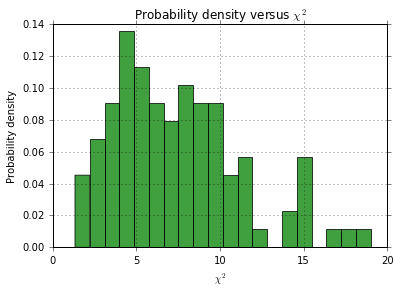

The figure above shows the histogram of the ${\chi}^2$ distribution resulting from the generation of 100 data sets and calculating chi^2 for each set.


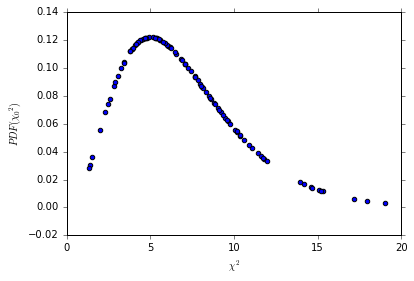

The figure above shows the plot of $P( {{\chi}_0}^2 )$ vs. ${{\chi}_0}^2.
The probability density function in (eq.1.29) was evaluated at each ${{\chi}_0}^2$ value by using chi2.pdf
Comparing the two figures, we have confirmed by doing several experiments that the distribution of ${{\chi}_0}^2$ is given by eq. 1.29.
As we can see from the figures, the corresponding probability densities for each ${{\chi}_0}^2$ in the histogram is not exactly the same as that in the second plot.
The experimental result (histogram) deviates from the theoretical prediction (eq. 1.29, second plot) by a small percent error 
by comparing the values of the probability density for each ${{\chi}_0}^2$ .


In [42]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gammainc
#The code given in gendata_book_post.py was used in this exercise


def fitfunc(t, a, om, phi, b):
    return a*np.sin(om*t + phi) * np.exp(-b*t)

a0s = []
om0s = []
phi0s = []
b0s = []

chi2vals = []
avals = []

probs = []
#Generate data sets:
for x in xrange(0,100):
    t = np.linspace(0, 3*np.pi, 11)
    #scale is standard deviation
    y = np.sin(t)*np.exp(-t/10.) + 0.4*np.random.normal(scale=0.3,size=11)
   
    np.savetxt('dampedosc.dat', zip(t,y))
    data = np.loadtxt('dampedosc.dat')
    
    fit = curve_fit(fitfunc, data[:,0], data[:,1], p0=[1.1, 1.1, 0.1, 0.2])[0]
    a0s.append(fit[0])
    om0s.append(fit[1])
    phi0s.append(fit[2])
    b0s.append(fit[3])
    
    ###calculate the sd_i
    sdis = []
    #calculate the mean:
    yvals = data[:,1]
    N = len(yvals)
    mu = sum(yvals)/N #mu is the mean


    sigma_i = np.sqrt(2./150)
    ##Calculate chi2 using 1.28:
    tvals = data[:,0]
    chi2val = 0.0
    for j in xrange(0,N):
        chi2jcomp =  ( (yvals[j]-fitfunc(tvals[j], a0s[x], om0s[x], phi0s[x], b0s[x]))/sigma_i )**2
        chi2val += chi2jcomp
    chi2vals.append(chi2val)





M = len(chi2vals)
mu = sum(chi2vals)/M


sigma1 = 0.0
for i in xrange(0,M):
    num = (chi2vals[i]-mu)**2
    sigma1 += num
sigma = (1./M)*np.sqrt(sigma1)


# the histogram of the data
n, bins, patches = plt.hist(chi2vals, 20, normed=1, facecolor='green', alpha=0.75)

# # add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('${\chi}^2$')
plt.ylabel('Probability density')
plt.title(r'Probability density versus ${\chi}^2$')
plt.xlim(0,max(chi2vals)+1)
plt.grid(True)
plt.show()
print 'The figure above shows the histogram of the ${\chi}^2$ distribution resulting from the generation of 100 data sets and calculating chi^2 for each set.'


tv = chi2.pdf(chi2vals,7)
plt.xlabel('${\chi}^2$')
plt.ylabel('$ PDF ( {{\chi}_0}^2 ) $')
plt.xlim(0,max(chi2vals)+1)
plt.scatter(chi2vals,tv)
plt.show()
print 'The figure above shows the plot of $P( {{\chi}_0}^2 )$ vs. ${{\chi}_0}^2.'
print 'The probability density function in (eq.1.29) was evaluated at each ${{\chi}_0}^2$ value by using chi2.pdf'
print 'Comparing the two figures, we have confirmed by doing several experiments that the distribution of ${{\chi}_0}^2$ is given by eq. 1.29.'
print 'As we can see from the figures, the corresponding probability densities for each ${{\chi}_0}^2$ in the histogram is not exactly the same as that in the second plot.'
print 'The experimental result (histogram) deviates from the theoretical prediction (eq. 1.29, second plot) by a small percent error '
print 'by comparing the values of the probability density for each ${{\chi}_0}^2$ .'


In [7]:
help(chi2.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(self, x, *args, **kwds) method of scipy.stats._continuous_distns.chi2_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x

